## Time Series Benchmark Models

To benchmark against classical forecasting approaches, we implemented SARIMA and Prophet on the aggregated weekly total sales data.


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
### SARIMA model

# Aggregate total daily sales across all categories
daily["total_sales"] = daily.loc[:, daily.columns.difference(["datum"])].sum(axis=1)

# Convert to weekly totals
weekly = daily.set_index("datum")["total_sales"].resample("W").sum()

# Train/test split (last 12 weeks for testing)
train = weekly[:-12]
test = weekly[-12:]

SARIMA - MAE: 1050.59, RMSE: 3428.39


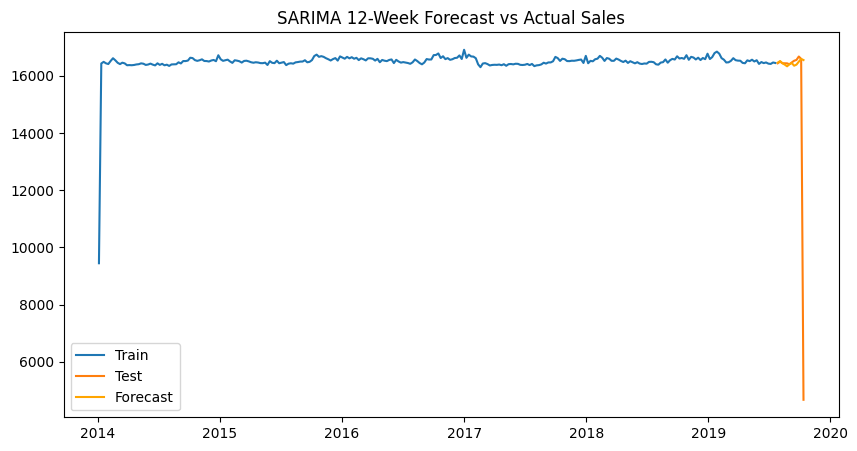

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_results = sarima_model.fit(disp=False)

# Forecast
forecast = sarima_results.forecast(steps=12)

# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = sqrt(mean_squared_error(test, forecast))
print(f"SARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.title('SARIMA 12-Week Forecast vs Actual Sales')
plt.legend()
plt.show()

Importing plotly failed. Interactive plots will not work.
12:07:00 - cmdstanpy - INFO - Chain [1] start processing
12:07:01 - cmdstanpy - INFO - Chain [1] done processing


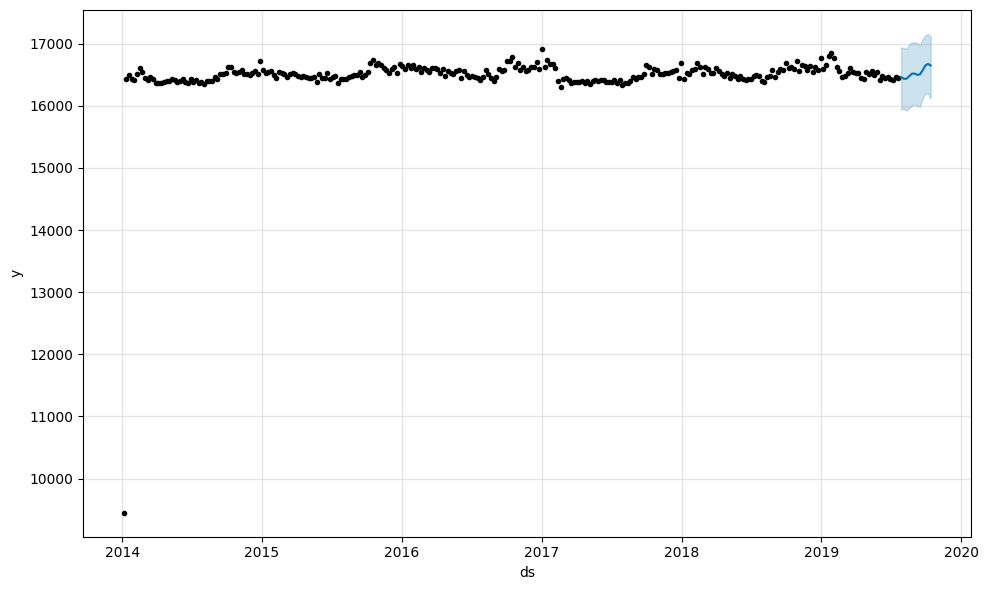

In [16]:
from prophet import Prophet

df = weekly.reset_index()
df.columns = ['ds', 'y']

model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df[:-12])
forecast = model.predict(df[-12:])

fig = model.plot(forecast)